In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn import preprocessing

### Reading data set

In [2]:
data=pd.read_csv('Company_Data.csv')
data

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [4]:
data['Sales'].describe()

count    400.000000
mean       7.496325
std        2.824115
min        0.000000
25%        5.390000
50%        7.490000
75%        9.320000
max       16.270000
Name: Sales, dtype: float64

### Categorizing sales column with lowsales:0 , medium sales:1 , high sales:2

In [5]:
def f(sales):
    if sales < 7:
        return '0'
    elif sales >= 7 and sales<=12:
        return '1'
    elif sales > 12:
        return '2'
    else:
        pass

In [6]:
d=data['Sales'].apply(f)

In [7]:
data['Sales']=d

In [8]:
sales_df=data
sales_df.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,1,138,73,11,276,120,Bad,42,17,Yes,Yes
1,1,111,48,16,260,83,Good,65,10,Yes,Yes
2,1,113,35,10,269,80,Medium,59,12,Yes,Yes
3,1,117,100,4,466,97,Medium,55,14,Yes,Yes
4,0,141,64,3,340,128,Bad,38,13,Yes,No


In [9]:
x=sales_df.iloc[:,1:]
y=sales_df['Sales']

In [10]:
x=pd.get_dummies(x,columns=['Urban','US'], drop_first=True)
x['ShelveLoc']=x['ShelveLoc'].map({'Good':1,'Medium':2,'Bad':3})
x

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban_Yes,US_Yes
0,138,73,11,276,120,3,42,17,1,1
1,111,48,16,260,83,1,65,10,1,1
2,113,35,10,269,80,2,59,12,1,1
3,117,100,4,466,97,2,55,14,1,1
4,141,64,3,340,128,3,38,13,1,0
...,...,...,...,...,...,...,...,...,...,...
395,138,108,17,203,128,1,33,14,1,1
396,139,23,3,37,120,2,55,11,0,1
397,162,26,12,368,159,2,40,18,1,1
398,100,79,7,284,95,3,50,12,1,1


In [11]:
y

0      1
1      1
2      1
3      1
4      0
      ..
395    2
396    0
397    1
398    0
399    1
Name: Sales, Length: 400, dtype: object

### Splitting into training and testing data

In [12]:
x_train, x_test,y_train,y_test = train_test_split(x,y, test_size=0.3,random_state=42)

In [13]:
print(x_train.shape, x_test.shape,y_train.shape,y_test.shape)

(280, 10) (120, 10) (280,) (120,)


# Randomforest classifier

In [33]:
num_trees = 100
max_features = 3
kfold = KFold(n_splits=12)
model = RandomForestClassifier(n_estimators=num_trees, max_features=max_features)
model.fit(x_train , y_train)

RandomForestClassifier(max_features=3)

In [34]:
kfold=KFold(n_splits=12)
scores=cross_val_score(model,x_train,y_train,cv=kfold)
print("Mean cross-validation score: {:.2f}".format(np.mean(scores)))
print("Standard deviation: {:.2f}".format(np.std(scores)))

Mean cross-validation score: 0.74
Standard deviation: 0.07


In [35]:
preds = model.predict(x_test) 
pd.Series(preds).value_counts() 

1    66
0    54
dtype: int64

In [36]:
pd.crosstab(y_test,preds)

col_0,0,1
Sales,,
0,40,9
1,14,45
2,0,12


##### Accuracy

In [37]:
np.mean(preds==y_test)

0.7083333333333334

###### Getting important features

In [38]:
important_features = model.feature_importances_
important_features

array([0.13251031, 0.10247402, 0.08339937, 0.10523005, 0.21899782,
       0.11629216, 0.14764418, 0.06265747, 0.01792956, 0.01286507])

In [39]:
important_features_df=pd.DataFrame(important_features,columns=['importance'])
important_features_df['features']=pd.DataFrame(x.columns)
important_features_df

,importance,features
0,0.132510,CompPrice
1,0.102474,Income
2,0.083399,Advertising
3,0.105230,Population
4,0.218998,Price
5,0.116292,ShelveLoc
6,0.147644,Age
7,0.062657,Education
8,0.017930,Urban_Yes
9,0.012865,US_Yes


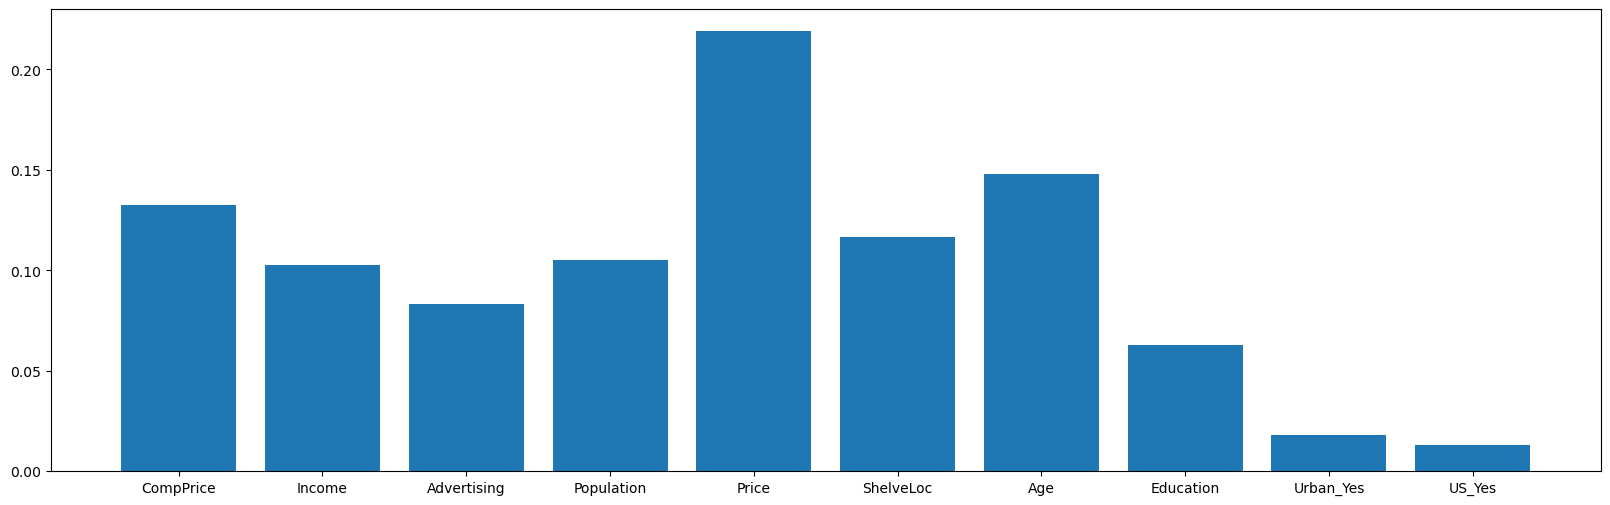

In [40]:
plt.figure(figsize =(20, 6))

plt.bar(important_features_df['features'], important_features_df['importance'], orientation = 'vertical');


### from above we can say price is important feature that affects sales of company